# A brief introduction to creating a machine learning model

In this notebook we will walkthrough the basic steps of creating a machine learning model for **classification**. This is an example of **supervised learning**, which will be the main focus of this course. To do this, we will create what is called a **k nearest neighbors (kNN)** model. By the end of this walkthrough you should get an initial look at:

  - the basic concepts of kNN
  - the *sklearn* API
  - the structure of feature and target data
  - splitting the data into train and valid sets
  - creating an instance of a kNN machine learning model
  - evaluating the model to see how well it makes predictions

## The concept of neighbourhood

<img src="neighbourhood.png" width=600 align="center">

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Create data

In [ ]:
from sklearn.datasets import make_classification

# create some classification data
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, random_state = 16)

## Plot the data 

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=100, c = y)
plt.title("Sample Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Feature data

In [ ]:
X  

In [ ]:
type(X)

In [ ]:
X.shape

## Target data

In [ ]:
y

In [ ]:
type(y)

In [ ]:
y.shape

## In tabular form

In [ ]:
df = pd.DataFrame({'Feature_1': X[:, 0], 'Feature_2': X[:, 1], 'Class': y})

df.head()

## What do we mean by nearest?
 
$\;$
$\;$
   

<img src="Euclidean_distance_2d.svg" width=600 align="left"/>



*Image source: By Kmhkmh - Own work, CC BY 4.0, https://commons.wikimedia.org/w/index.php?curid=67617313*

$\;$
$\;$
   

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=120, c = y)
plt.scatter(0.2, -2, marker='*', s=380, c='red')
plt.title("Sample Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.rcParams["figure.figsize"] = (6, 6)
plt.show()

##  Split the data into train and valid sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

#### Train data

In [ ]:
X_train

In [ ]:
type(X_train)

In [ ]:
X_train.shape

In [ ]:
y_train

In [ ]:
type(y_train)

In [ ]:
y_train.shape

#### valid data

In [ ]:
X_valid

In [ ]:
type(X_valid)

In [ ]:
X_valid.shape

In [ ]:
y_valid

In [ ]:
type(y_valid)

In [ ]:
y_valid.shape

## Create a kNN classifier

Once our data is in the proper format, we would like to build our classifier. The steps involved in this process are:

1. Select the model and import from sklearn
2. Instantiate the model and set model parameters
3. Train the model
4. Evaluate the model
5. Use the model

##### Step 1. Select the model and import from sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  

##### Step 2. Instantiate the model and set model parameters

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)           

##### Step 3. Train the model

In [ ]:
clf.fit(X_train, y_train)                           

##### Step 4. Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score

acc_train = clf.score(X_train, y_train)
acc_valid = clf.score(X_valid, y_valid)

print(f"Training set accuracy: {acc_train:.2f}")  
print(f"valid set accuracy: {acc_valid:.2f}")  

##### Step 5. Use the model

**New data point: `[2.5, 1.9]`**

In [ ]:
print("New prediction:", clf.predict([[2.5, 1.9]])) 

In [ ]:
# returns the k nearest neighbors for a given test point
# the first array contains the distances to the neighbors
# the second array contains the indices of the neighbors
clf.kneighbors([[2.5, 1.9]], 3)

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=120, c = y_train)
plt.scatter(2.5, 1.9, s=380,  marker='*', c='red')
plt.scatter(X_train[50, 0], X_train[50, 1], s=380, facecolors='none', edgecolors='r', marker='o')
plt.scatter(X_train[65, 0], X_train[65, 1], s=380, facecolors='none', edgecolors='b', marker='o')
plt.scatter(X_train[9, 0], X_train[9, 1], s=380, facecolors='none', edgecolors='g', marker='o')
plt.title("Sample Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.rcParams["figure.figsize"] = (6,6)
plt.show()

**New data point: `[0.2, 0]`**

In [ ]:
print("New prediction:", clf.predict([[0.2, 0]])) 

In [ ]:
# returns the k nearest neighbors for a given test point
# the first array contains the distances to the neighbors
# the second array contains the indices of the neighbors
clf.kneighbors([[0.2, 0]], 3)

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=120, c = y_train)
plt.scatter(0.2, 0, s=380,  marker='*', c='red')
plt.scatter(X_train[36, 0], X_train[36, 1], s=380, facecolors='none', edgecolors='r', marker='o')
plt.scatter(X_train[38, 0], X_train[38, 1], s=380, facecolors='none', edgecolors='b', marker='o')
plt.scatter(X_train[71, 0], X_train[71, 1], s=380, facecolors='none', edgecolors='g', marker='o')
plt.title("Sample Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

## Create a kNN regressor

Once our data is in the proper format, we would like to build our classifier. The steps involved in this process are:

1. Select the model and import from sklearn
2. Instantiate the model and set model parameters
3. Train the model
4. Evaluate the model
5. Use the model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error

rent = pd.read_csv("rent-ideal.csv")

X = rent.drop("price", axis=1)
y = rent["price"]


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train, y_train)

R2_train = regressor.score(X_train, y_train)
R2_valid = regressor.score(X_valid, y_valid)


print(f"Training set R^2: {R2_train:.2f}")  
print(f"valid set R^2: {R2_valid:.2f}")

**Coefficient of determination**

$$R^2 = 1 - \frac{\sum_{i=1}^m (y{\rm \_ true}_i - y{\rm \_ pred}_i)^2}{\sum_{i=1}^m (y{\rm \_ true}_i - y{\rm \_ mean})^2}$$

**Change evaluation metric**

In [ ]:

y_pred = regressor.predict(X_valid)

rmse = root_mean_squared_error(y_valid, y_pred)
print(f"Root Mean Squared Error = {rmse:.2f}")

### Selecting `k`

`k` in k-nearest neighbours is what is called a **hyperparameter**. Its value must be chosen before the model can be trained. Unfortunately, we won't know the value of `k` that gives the best results ahead of time. To determine that value, we will have to explore the performance of models with different values of `k`.

In [161]:
valid_scores = []
rmse_scores = []
k_range = range(1, 21)

for k in k_range:
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train, y_train)
    R2_valid = regressor.score(X_valid, y_valid)
    valid_scores.append(R2_valid)
    y_pred = regressor.predict(X_valid)
    rmse = root_mean_squared_error(y_valid, y_pred)
    rmse_scores.append(rmse)

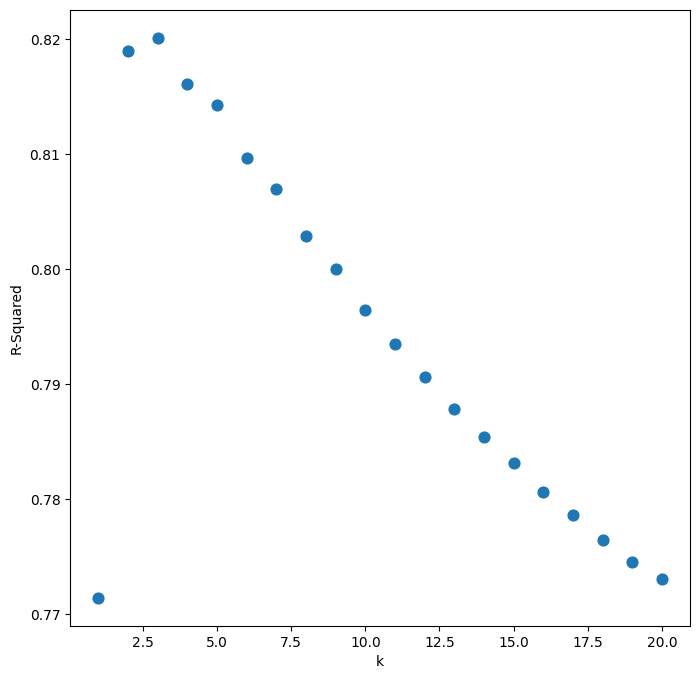

In [160]:
plt.scatter(k_range, valid_scores, s=60)
plt.title("Selecting k with the Validation Set")
plt.xlabel("k")
plt.ylabel("R-Squared")
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

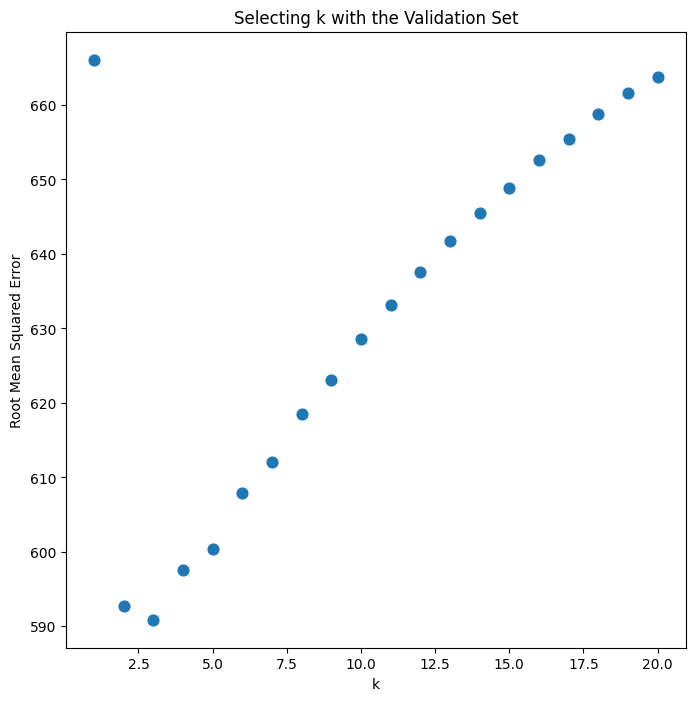

In [163]:
plt.scatter(k_range, rmse_scores, s=60)
plt.title("Selecting k with the Validation Set")
plt.xlabel("k")
plt.ylabel("Root Mean Squared Error")
plt.rcParams["figure.figsize"] = (8,8)
plt.show()